# Prøve-eksamen i Fys1120 H2022 - oppgave 1

Dette oppgavesettet tilsvarer en av to oppgaver som dere vil få til eksamen. (Denne oppgaven er stor, så den andre oppgaven vil være mindre). Hver oppgave på eksamen vil bestå av en Jupyter-notebook som dette. Dere arbeider med oppgaven i notebook'en og leverer notebook'en som en pdf file ved å lagre notebook'en og så laste den opp i inspera.

Dere vil kunne får både teori-oppgaver, programmerings-oppgaver og diskusjons-oppgaver som del av eksamen. Alle svarene skal dere skrive i den samme notebook'en.

## Elektrisk potensial og felt rundt en ringladning
Vi skal i denne oppgaven studere det elektriske potensialet rundt en ringformet ladning med radius $a$ som ligger i $xy$-planet. Ringen har en total ladning $q$ som er uniformt fordelt på ringen.

### Oppgave (a) 
Vis at det elektriske potensialet $V(z)$ langs $z$-aksen er gitt som
$$V(z) = \frac{q}{4 \pi \epsilon_0 (a^2 + z^2)^{1/2}}$$
(Du kan ikke levere en figur, så du må forklare hva du gjør med ord og matematiske uttrykk.)

Vi bruker det generellet utrykket for potensialet til en ringlading i xy-planet med uniform ladningsfordeling

$$
V(z) = \frac{q}{4 π ϵ_0R}
$$
Hvor $\bf R $ er avstanden fra ladningen til punktet. All ladning ligger på en sirkel med radius a og observasjonspunktet ligger på en høyde z. Da kan vi bruke pytagoras for å finne avstanden mellom dem
$$
R = a^2 + z^2
$$
$$
V(z) = \frac{q}{4 π ϵ_0(a^2 + z^2)^{1/2}}
$$




### Eksempel
Som en hjelp til å løse oppgaven, kan du ta utgangspunkt i dette eksempelet.

Det elektriske potensialet fra en dipol langs $z$-aksen kan beregnes og visualiseres ved hjelp av følgende program.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def epotlist(r,Q,R):
    epsilon0 = 8.854e-12
    K = 1.0/(4.0*np.pi*epsilon0)
    V = 0
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        V = V + qi/Rinorm
    V = V*K
    return V
def findpot(R,Q,x0,x1,z0,z1,Nx,Nz): 
    x = np.linspace(x0,x1,Nx)
    z = np.linspace(z0,z1,Nz)
    rx,rz = np.meshgrid(x,z)
    V = np.zeros((Nx,Nz),float)
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],0,rz.flat[i]])
        V.flat[i] = epotlist(r,Q,R) 
    return x,z,rx,rz,V

In [17]:
Q = []
R = []
a = 1.0
q = 1.0
R.append(np.array([0,0,-a/2]))
Q.append(-q)
R.append(np.array([0,0,a/2]))
Q.append(q)
x,z,rx,rz,V = findpot(R,Q,-1*a,1*a,-1*a,1*a,30,30)

(-1.1, 1.1, -1.1, 1.1)

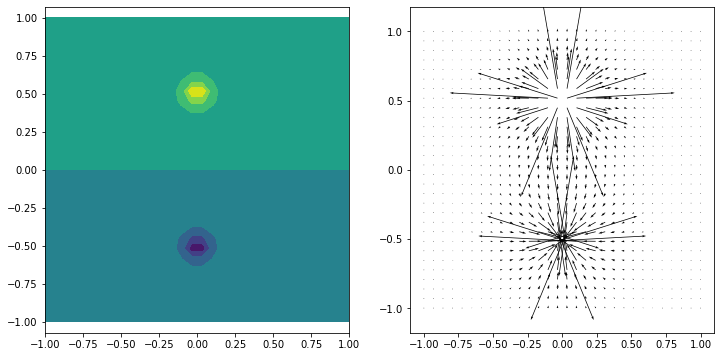

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.contourf(rx,rz,V)
plt.axis('equal')
plt.subplot(1,2,2)
Ez,Ex = np.gradient(-V)
plt.quiver(rx,rz,Ex,Ez)
plt.axis('equal')

## Sirkelladning
Vi skal nå se på en ladning formet som en sirkel med radius $a = 1 \text{cm}$ i $xy$-planet. Hele sirkelen har ladningen $q = 1 \text{mC}$.

### Oppgave (b)

Skriv et program som finner det elektriske potensialet i $xy$-planet og i $xz$-planet og visualiser potensialet og feltet i et område som illustrerer oppførselen godt.

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit


a = 0.01
q = 0.001
N = 200
L = 2*a
epsilon0 = 8.854E-12


In [176]:
@njit
def epotCircle(r, q, radius, N = 100):
    
    V = 0
    dq = q/N
    dθ = 2*np.pi/N
    
    
    if np.linalg.norm(r) < radius and r[2] == 0:
        return q/(4*np.pi*epsilon0*radius)
    
    
    for i in range(N):
        rq = radius*np.array([np.cos(dθ*i), np.sin(dθ*i), 0])
        R = np.linalg.norm(r - rq)
        V += dq/(4*np.pi*epsilon0*R)
            
    return  V

In [177]:
x, y = [np.linspace(-L, L, N) for i in range(2)]
rx, ry = np.meshgrid(x, y)
Vxy = np.zeros((N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], 0])
    Vxy.flat[i] = epotCircle(r, q, a)

(-0.02, 0.02, -0.02, 0.02)

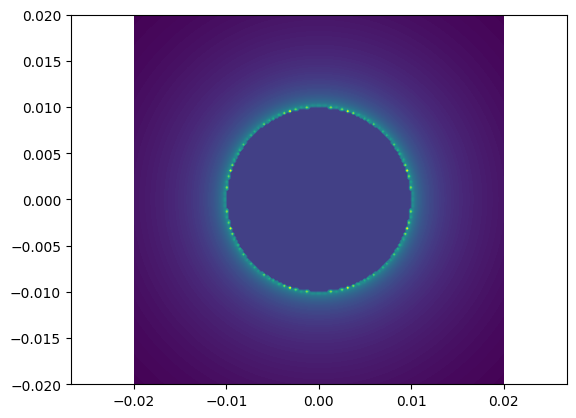

In [193]:
plt.contourf(rx, ry, Vxy, levels = 200)
plt.axis('equal')

In [179]:
x, z = [np.linspace(-L, L, N) for i in range(2)]
rx, rz = np.meshgrid(x, z)
Vxz = np.zeros((N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], 0, rz.flat[i]])
    Vxz.flat[i] = epotCircle(r, q, a)

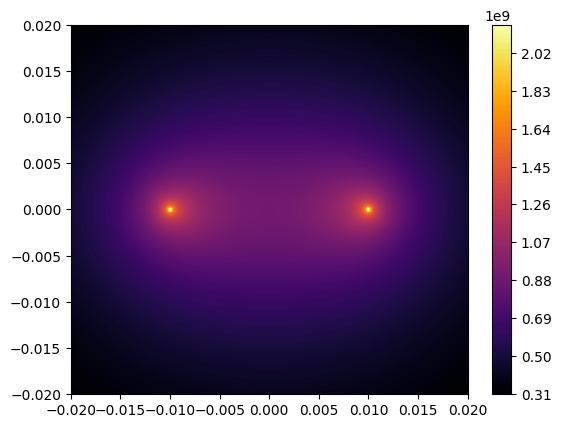

In [180]:
plt.contourf(rx, rz, Vxz, levels = 200, cmap = 'inferno')
plt.colorbar()

## Sammenlikning med teori nær $z$-aksen

### Oppgave (c)
Vi ønsker å sammenlikne det eksakte resutatet vi fant langs $z$-aksen med resultatet fra programmet ditt nær $z$-aksen for å se hvor stor feil vi får hvis vi bruker det eksakte resultet i et område hvor det ikke er gyldig. Lag et plot av $V(a/2,0,z)$ og sammenlikn med det eksakte resultatet i $(0,0,z)$ for $z = -2a$ til $z=2a$. Kommenter kort resultatet.

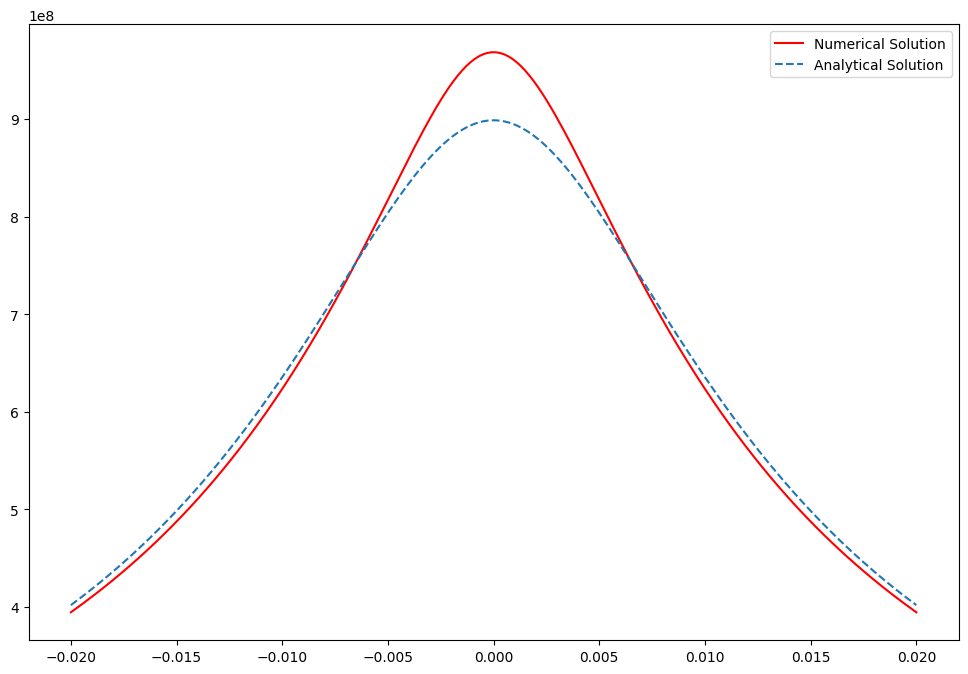

In [192]:
def V(z):
    return q/(4*np.pi*epsilon0*(a**2 + z**2)**.5)

z = np.linspace(-2*a, 2*a, N)
Vz = V(z)
index = int(5*N/8)

plt.figure(figsize=(12, 8))
plt.plot(z, Vxz[:,index], color = 'red', label = 'Numerical Solution')
plt.plot(z, Vz, linestyle = '--', label = 'Analytical Solution') 
plt.legend()

## Sammenlikning med teori langt vekk fra linjestykket i $xy$-planet

### Oppgave (d)
Hva forventer du at det elektriske potensialet $V(x,y,0)$ vil være når $r = (x^2+ y^2)^{1/2} r\gg a$? Du skal komme fram til et enkelt uttrykk for $V(r)$ og gi en kort forklaring for hvorfor dette uttrykket er en god tilnærming i den oppgitte grensen. 

Vi forventer at potensialet skal være null når du går langt vekk fra sirkelen. Langt unna sirkelen kan vi tilnærme sirkelen til å være en punktladning plassert i origio med ladning. 

$$
V(r) = \frac{q}{4 π ϵ_0R}, \quad \mathbf R = \mathbf r - \mathbf r' = (x,y,0) - (0,0,0) = (x,y,0)
$$
$$
V(r) = \frac{q}{4 π ϵ_0\sqrt{x^2 + y^2}}
$$




### Oppgave (e)
Sammenlikn resultatet fra programmet ditt med $V(r)$ for eksempel ved å plotte $V(r)$ for $r = a+a/10$ til $r= 10a$.

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit


a = 0.01
q = 0.001
N = 200
epsilon0 = 8.854E-12

def V(x):
    return q/(4*np.pi*epsilon0*x)

x = np.linspace(11/10*a, 10*a, N)
V_Anal = V(x)

 
rx, ry = np.meshgrid(x, y)
V_Num = np.zeros((N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], 0])
    V_Num.flat[i] = epotCircle(r, q, a)
    

r_norm = np.array(list(zip(x**2 + y**2)))

(200, 1)


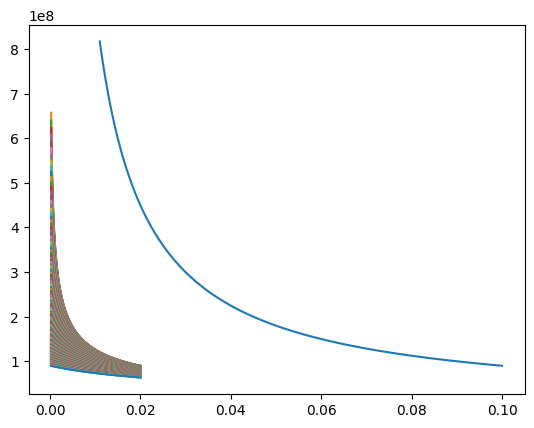

In [218]:
print(r_norm.shape)
plt.plot(x, V_Anal)
plt.plot(r_norm, V_Num)